In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Note

pclass: A proxy for socio-economic status (SES)
> 1st = Upper  
> 2nd = Middle  
> 3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
> Sibling = brother, sister, stepbrother, stepsister  
> Spouse = husband, wife (mistresses and fiancés were ignored)  


parch: The dataset defines family relations in this way...
> Parent = mother, father  
> Child = daughter, son, stepdaughter, stepson  
> Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
# 분석용 차트
import matplotlib.pyplot as plt

# survived_crosstab과 pie_chart이용해서 파이 차트 그리기
def show_pie(df, cols):
    crosstab_dataframe = survived_crosstab(df, cols)
    pie_chart(crosstab_dataframe)

# cols와 survived간의 교차도표 생성
def survived_crosstab(df, cols):
    crosstab_dataframe = pd.crosstab( df[cols], df['Survived'])
    crosstab_dataframe.columns = crosstab_dataframe.columns.map({0:'Dead', 1:'Survived'})
    return crosstab_dataframe


# 파이 그래프 그리기
def pie_chart(df):
    # pie chart
    # pcol, prow = 차트를 출력할 개수, pcol * prow 만큼의 차트 출력
    
    frows, fcols = df.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))
    
    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)
        
        index_name = df.index[row]
        plt.pie(df.loc[index_name], labels=df.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{}' survived".format(index_name))
        
    plt.show()
    

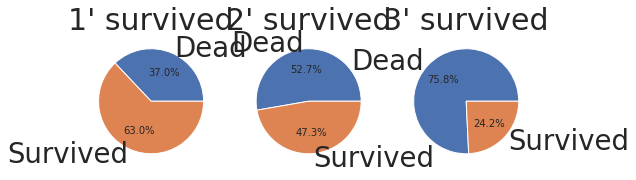

In [6]:
# PassengerId : index
# Survived : Dead / Alive
# Pclass :  1st = Upper, 2nd = Middle, 3rd = Lower
show_pie(df_train, 'Pclass')

# Upper class survived: 63.0%
# Middle class survived: 47.3%
# Lower class survived: 24.2%

In [10]:
# Name : Name of passenger => to Title
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.')
df_train.Title.head()

df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.')
df_test.Title.head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [72]:
df_train.Title.unique()
df_test.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [15]:
df_train[df_train['Title']== 'Mme'][['Sex','Age']] # Mme : female / 24
df_train[df_train['Title']=='Mlle'][['Sex','Age']] # Mlle : female / 24
df_train[df_train['Title']=='Sir'][['Sex','Age']] # Sir : male / 49
df_train[df_train['Title']=='Jonkheer'][['Sex','Age']] # Jonkheer : male / 38
df_train[df_train['Title']=='Lady'][['Sex','Age']] # Lady : female/48
df_train[df_train['Title']=='Capt'][['Sex','Age']] # Capt : male / 70
df_train[df_train['Title']=='Don'][['Sex','Age']] # Don : male / 40
df_train[df_train['Title']=='Ms'][['Sex','Age']] # female : female/28
df_train[df_train['Title']=='Countess'][['Sex','Age']] # Countess : female / 33
df_train[df_train['Title']== 'Major'][['Sex','Age']] # Major449 : male / 52   Major536 : male / 45
df_train[df_train['Title']== 'Col'][['Sex','Age']] # Col647 : male / 56   Col694 : male / 60

# Dr / Rev => others




,Sex,Age


In [13]:
df_test[df_test['Title']== 'Mme'][['Sex','Age']] # Mme : female / 24
df_test[df_test['Title']=='Mlle'][['Sex','Age']] # Mlle : female / 24
df_test[df_test['Title']=='Sir'][['Sex','Age']] # Sir : male / 49
df_test[df_test['Title']=='Jonkheer'][['Sex','Age']] # Jonkheer : male / 38
df_test[df_test['Title']=='Lady'][['Sex','Age']] # Lady : female/48
df_test[df_test['Title']=='Capt'][['Sex','Age']] # Capt : male / 70
df_test[df_test['Title']=='Don'][['Sex','Age']] # Don : male / 40
df_test[df_test['Title']=='Ms'][['Sex','Age']] # female : female/28
df_test[df_test['Title']=='Countess'][['Sex','Age']] # Countess : female / 33
df_test[df_test['Title']== 'Major'][['Sex','Age']] # Major449 : male / 52   Major536 : male / 45
df_test[df_test['Title']== 'Col'][['Sex','Age']] # Col647 : male / 56   Col694 : male / 60

# Dr / Rev => others




,Sex,Age
131,male,53.0
202,male,47.0


In [14]:
df_train[df_train['Title']=='Mr']['Age'].mean() # 32.4
df_train[df_train['Title']=='Miss']['Age'].mean() # 21.8
df_train[df_train['Title']=='Mrs']['Age'].mean() # 35.9
df_train[df_train['Title']=='Master']['Age'].mean() # 4.6

df_train['Title'] = df_train['Title'].replace('Mme', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Sir', 'Mr')
df_train['Title'] = df_train['Title'].replace('Jonkheer', 'Mr')
df_train['Title'] = df_train['Title'].replace('Sir', 'Mr')
df_train['Title'] = df_train['Title'].replace('Lady', 'Mrs')
df_train['Title'] = df_train['Title'].replace('Capt', 'Mr')
df_train['Title'] = df_train['Title'].replace('Don', 'Mr')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Countess', 'Mrs')
df_train['Title'] = df_train['Title'].replace('Major', 'Mr')
df_train['Title'] = df_train['Title'].replace('Col', 'Mr')

df_train['Title'] = df_train['Title'].replace(['Dr', 'Rev'], 'Others')


In [68]:
df_test[df_test['Title']=='Mr']['Age'].mean() # 32.2
df_test[df_test['Title']=='Miss']['Age'].mean() # 21.8
df_test[df_test['Title']=='Mrs']['Age'].mean() # 38.9
df_test[df_test['Title']=='Master']['Age'].mean() # 7.4

df_test['Title'] = df_test['Title'].replace('Mme', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Sir', 'Mr')
df_test['Title'] = df_test['Title'].replace('Jonkheer', 'Mr')
df_test['Title'] = df_test['Title'].replace('Sir', 'Mr')
df_test['Title'] = df_test['Title'].replace('Lady', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Capt', 'Mr')
df_test['Title'] = df_test['Title'].replace('Don', 'Mr')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Countess', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Major', 'Mr')
df_test['Title'] = df_test['Title'].replace('Col', 'Mr')
df_test['Title'] = df_test['Title'].replace('Dona', 'Mrs')

df_test['Title'] = df_test['Title'].replace(['Dr', 'Rev'], 'Others')


In [99]:
# Age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# 호칭별 나이 평균
mean_age = df_train[['Title', 'Age']].groupby('Title').mean()


# 호칭과 호칭별 나이 평균값을 하나씩 가져온다 (ex :  index = Master, row = Age 4.574167)
# train_set.Title == Master 이고 train_set.Age가 null인 것의 index 들을 가져와서
# train_set.loc['65', 'Age'] = 4.574167
for index, row in mean_age.iterrows():
#     print('index: {}, row: {}'.format(index, row))
    nullIndex = df_train[(df_train.Title == index) & (df_train.Age.isna())].index
#     print('nullIndex: ', nullIndex)
#     print('row[0] : ', row[0])
    df_train.loc[nullIndex, 'Age'] = row[0]

    
df_train['AgeCategory'] = pd.qcut(df_train.Age, 8, labels=range(1, 9))
df_train.AgeCategory = df_train.AgeCategory.astype(int)


In [20]:
# Age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# 호칭별 나이 평균
mean_age = df_test[['Title', 'Age']].groupby('Title').mean()


# 호칭과 호칭별 나이 평균값을 하나씩 가져온다 (ex :  index = Master, row = Age 4.574167)
# train_set.Title == Master 이고 train_set.Age가 null인 것의 index 들을 가져와서
# train_set.loc['65', 'Age'] = 4.574167
for index, row in mean_age.iterrows():
#     print('index: {}, row: {}'.format(index, row))
    nullIndex = df_test[(df_test.Title == index) & (df_test.Age.isna())].index
#     print('nullIndex: ', nullIndex)
#     print('row[0] : ', row[0])
    df_test.loc[nullIndex, 'Age'] = row[0]

    
df_test['AgeCategory'] = pd.qcut(df_test.Age, 8, labels=range(1, 9))
df_test.AgeCategory = df_test.AgeCategory.astype(int)


In [21]:
# Sex col need One-hot encoding
# female = 0, male = 1

df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_train

df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,Q,Mr,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,S,Mrs,8
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,Q,Mr,8
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,S,Mr,4
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,S,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,32.194595,0,0,A.5. 3236,8.0500,NaN,S,Mr,5
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C,Dona,7
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,7
416,1308,3,"Ware, Mr. Frederick",1,32.194595,0,0,359309,8.0500,NaN,S,Mr,5


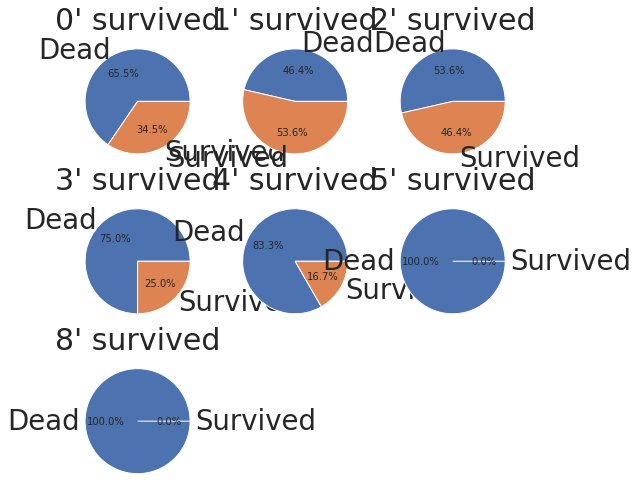

In [23]:
# SibSp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)



show_pie(df_train, 'SibSp')

# meaning 'havnig 1~2 sibling or sprouse seem to have more survivability'

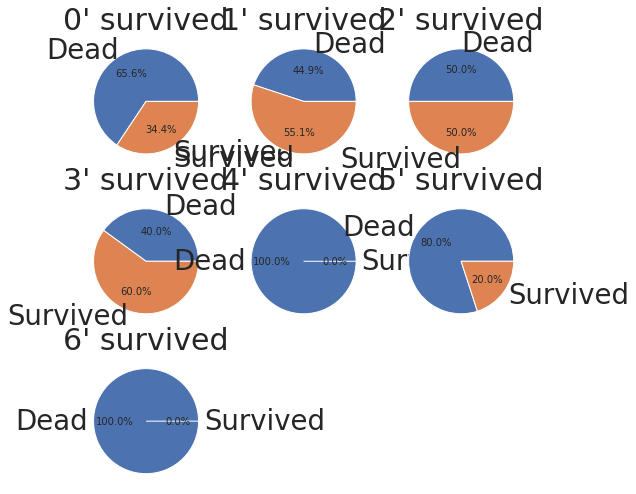

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
# Parch

show_pie(df_train, 'Parch')

df_train.Parch.value_counts()

# 1 ~ 2명의 Parch 즉, 부모님과 함께 탑승 했을때 생존률이 좀더 높다

## Family = Sibsp + Parch


In [25]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['FamilySize']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64

In [26]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  10
Minimum size of Family:  0


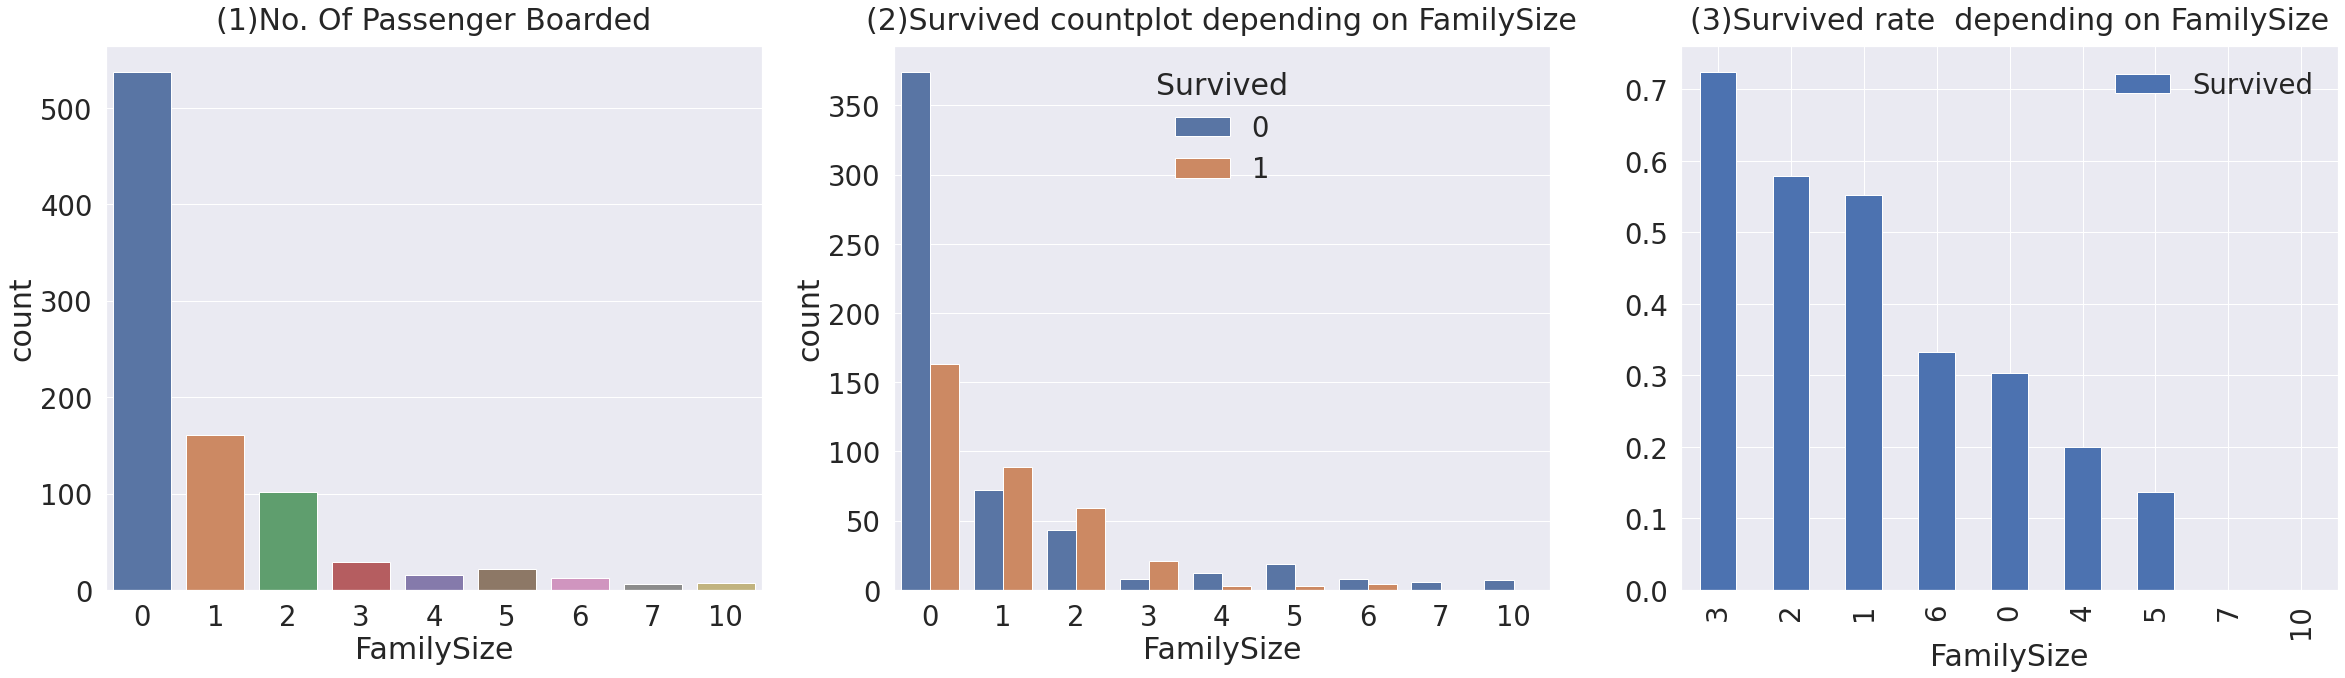

In [27]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1)No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2)Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3)Survived rate  depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [28]:
# ticket

df_train.Ticket.value_counts()
df_train.Ticket.isna().sum() # 0

0

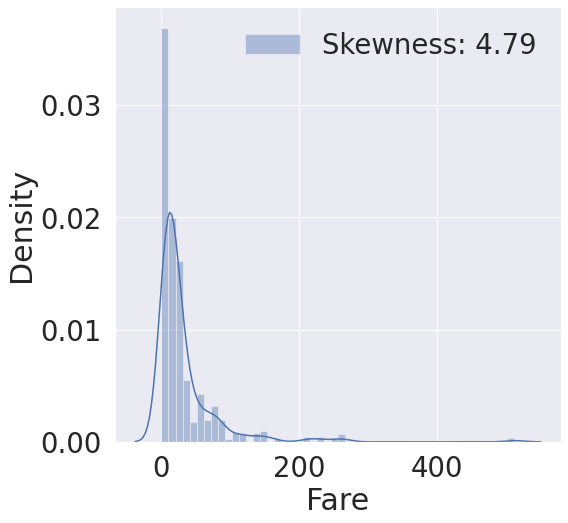

In [29]:
# Fare
df_train.Fare.value_counts()
df_train.Fare.isna().sum() # 0

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color="b", label="Skewness: {:.2f}".format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 

In [30]:
# Fare 로그화를 통해 skewness
# Feature Engineering => 모델 성능 상향을 위해 피처를 이리저리 만저보는 것

df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i > 0 else 0)



In [31]:
# Cabin
df_train.Cabin.value_counts()
df_train.Cabin.isna().sum() # 687

df_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

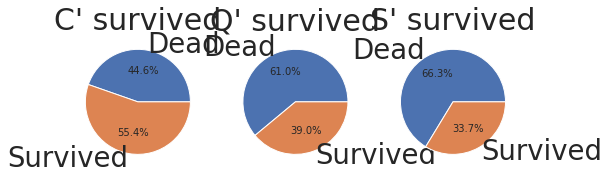

In [32]:
# Embarked
df_train.Embarked.value_counts()
df_train.Embarked.isna().sum() # 2


show_pie(df_train, 'Embarked')


<AxesSubplot:xlabel='Title'>

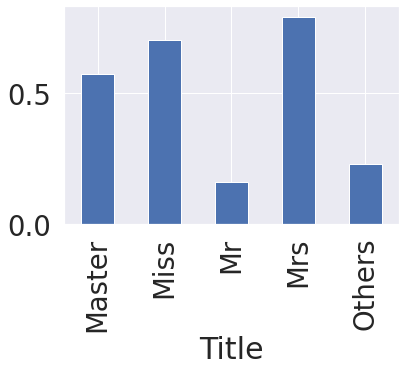

In [58]:
df_train.groupby('Title')['Survived'].mean().plot.bar()

## Feature Engineering

In [73]:
df_all = pd.concat([df_train, df_test])
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,1.981001,NaN,S,Mr,3,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,4.266662,C85,C,Mrs,7,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss,4,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,3.972177,C123,S,Mrs,6,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,2.085672,NaN,S,Mr,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,32.194595,0,0,A.5. 3236,8.050000,NaN,S,Mr,5,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.900000,C105,C,Mrs,7,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,Mr,7,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",1,32.194595,0,0,359309,8.050000,NaN,S,Mr,5,NaN


In [82]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,1.981001,NaN,S,Mr,3,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,4.266662,C85,C,Mrs,7,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss,4,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,3.972177,C123,S,Mrs,6,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,2.085672,NaN,S,Mr,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,32.194595,0,0,A.5. 3236,8.050000,NaN,S,Mr,5,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.900000,C105,C,Mrs,7,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,Mr,7,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",1,32.194595,0,0,359309,8.050000,NaN,S,Mr,5,NaN


In [75]:
df_all.groupby(['Title']).mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeCategory,FamilySize
Title,,,,,,,,,,
Master,658.852459,0.575000,2.655738,1.0000,5.549222,2.04918,1.377049,15.442677,1.000000,3.675000
Miss,616.992453,0.704301,2.332075,0.0000,21.834614,0.65283,0.494340,14.021188,2.833962,1.236559
Mr,659.621904,0.160000,2.363755,1.0000,32.568018,0.28292,0.159061,10.118032,4.803129,0.440000
Mrs,688.775000,0.795276,1.925000,0.0000,37.048616,0.65500,0.820000,24.322011,5.715000,1.511811
Others,626.062500,0.230769,1.625000,0.9375,42.348958,0.43750,0.187500,10.157599,6.500000,0.461538


In [83]:
# indexing 문법
# loc
df_all.loc[:,:]
df_all.loc[1,:]


# df_train.loc[(df_train['Age'].isnull()) & (df_train['Title']=='Mr'), 'Age']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,FamilySize
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,7,1.0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.000000,NaN,S,Mrs,8,NaN


In [87]:
df_all.loc[(df_all['Age'].isna()) & (df_all['Title'] == 'Mr'), 'Age'] = 

Series([], Name: Age, dtype: float64)

In [93]:
# Fill Null in Embarked
df_train.Embarked.isna().sum()
df_test.Embarked.isna().sum()

0

In [90]:
df_train['Embarked'].fillnaa('S', inplace=True)

In [92]:
df_train.Embarked.isna().sum()

0

In [94]:
df_train['Age_Cat'] = 0

In [ ]:
# Categorize Age

df_train.loc[df_train['Age'] < 10, 'Age_Cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df+train['Age'] < 20), 'Age_Cat' ] = 1
df_train.loc[(20 <= df_train['Age']) & (df+train['Age'] < 30), 'Age_Cat' ] = 2
df_train.loc[(30 <= df_train['Age']) & (df+train['Age'] < 40), 'Age_Cat' ] = 3
df_train.loc[(40 <= df_train['Age']) & (df+train['Age'] < 50), 'Age_Cat' ] = 4
df_train.loc[(50 <= df_train['Age']) & (df+train['Age'] < 60), 'Age_Cat' ] = 5
df_train.loc[(60 <= df_train['Age']) & (df+train['Age'] < 70), 'Age_Cat' ] = 6
df_train.loc[70 <= df_train['Age'], 'Age_Cat' ] = 7



In [97]:
# Categorize Age

df_train.loc[df_train['Age'] < 10, 'Age_Cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_Cat' ] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_Cat' ] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_Cat' ] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_Cat' ] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_Cat' ] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_Cat' ] = 6
df_train.loc[70 <= df_train['Age'], 'Age_Cat' ] = 7



In [95]:
df_test.loc[df_test['Age'] < 10, 'Age_Cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_Cat' ] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_Cat' ] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_Cat' ] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_Cat' ] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_Cat' ] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_Cat' ] = 6
df_test.loc[70 <= df_test['Age'], 'Age_Cat' ] = 7

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,FamilySize,Age_Cat
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,4.266662,C85,C,Mrs,7,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,3.972177,C123,S,Mrs,6,1,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,2.085672,NaN,S,Mr,6,0,3
5,6,0,3,"Moran, Mr. James",1,32.740148,0,0,330877,2.135148,NaN,Q,Mr,5,0,3
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,3.948596,E46,S,Mr,8,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",1,32.740148,0,0,349217,2.066331,NaN,S,Mr,5,0,3
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.000000,0,1,11767,4.420746,C50,C,Mrs,8,1,5
881,882,0,3,"Markun, Mr. Johann",1,33.000000,0,0,349257,2.066331,NaN,S,Mr,6,0,3
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.000000,0,5,382652,3.371597,NaN,Q,Mrs,7,5,3
